<a href="https://colab.research.google.com/github/hotz1/JSC270_Assg2/blob/main/JSC270_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Libraries you'll likely need

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

###Importing data

In [215]:
income94 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
income94.columns = ['age','workclass', 'fnlwgt','education','education_num','marital_status','occupation',
                    'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','gross_income_group']

income94.shape

(32561, 15)

Using the `.shape` function, we can see that the `income94` dataset is 32561x15, i.e. the dataset has 32561 rows and 15 columns. These 32561 rows represent individual people in the census, and each of the 15 columns represents an observation about that person.

###Exploring the Data:

In [216]:
# This command is used to see the different types of data in the dataframe. We can see that of the 15 columns described above, 6 of them contain 
# numerical values (integer values) and the other 9 contain object values, which generally signify categorical data.

# Looking at the .head() of the data above, we see that there are 6 columns (age, education_num, capital_gain, capital_loss, hours_per_week) which are 
# numerical, and the remaining 9 columns store categorical variables. This lined up with the information shown by this command.
print(income94.info())
print('\n')
income94.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           32561 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          32561 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      32561 non-null  object
 14  gross_income_group  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None




,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,gross_income_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Using the `.info()` function allows us to see a broad overview of the different types of data in our dataframe. As we can see, the "non-null count" for each column is 32561 entries, which is the total number of rows in our dataset, as we saw by calling the `shape` function earlier. 

However, this does not necessarily mean that the entire dataset is usable, as missing values may ne recorded under a different non-null entry.

The `.head()` function allows us to get a better look at our data, and see the different types of data which are in each of the columns, but it still is only showing a tiny proportion of our dataset.

### Looking for missing observations
Now that we have done some initial exploring of the data, we would like to see if there are any missing observations which could potentially cause errors in our analysis.

In [217]:
# This line of code returns the amount of non-null values in the dataframe. As mentioned above, this will not be able to help us see if there
# is any missing categorical data, since those 'fillers' could still be different object-types, but this does help us see if there are any missing numerical values.
income94.count()

age                   32561
workclass             32561
fnlwgt                32561
education             32561
education_num         32561
marital_status        32561
occupation            32561
relationship          32561
race                  32561
sex                   32561
capital_gain          32561
capital_loss          32561
hours_per_week        32561
native_country        32561
gross_income_group    32561
dtype: int64

Since there are 32561 non-null values in each row, we do not have any blank spaces where there should be data; nor do we have any `NaN`'s in our dataset where there should be an actual number.

In [218]:
# The following loop is used to ensure that the columns are as we expected them to be, and that they contain the right information.
# This loop also tries to present the information in a somewhat readable format by spacing out the different observations.

for col in income94.columns:
  print("Observation Column: " + col)
  print(income94[col].value_counts())
  print('\n')

Observation Column: age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64


Observation Column: workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


Observation Column: fnlwgt
164190    13
203488    13
123011    13
113364    12
121124    12
          ..
284211     1
312881     1
177711     1
179758     1
229376     1
Name: fnlwgt, Length: 21648, dtype: int64


Observation Column: education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Do

###Fixing Missing Observations:
We see that there are some missing observations in some of the columns which store categorical data. These missing observations are denoted with `?` characters in the dataframe.

In particular, there are 1836 missing observations in the `workclass` column, 1843 missing observations in the `occupation` column, and 583 missing observations in the `native_country` column.

In [219]:
# This loop isnt working 

### TODO: WORK OUT HOW TO CHANGE '?' TO SOMETHING WE CAN WORK WITH

###Distributions of Capital Gains and Losses:

In the following lines of code, we will create histograms which show the capital gains and losses of the people in this census.

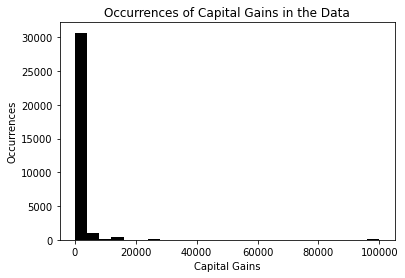

In [220]:
# Creates a histogram for the capital gains 
plt.hist(income94['capital_gain'], bins = 25, color="black") # Monetary gains are referred to as being "in the black"
plt.title('Occurrences of Capital Gains in the Data')
plt.xlabel('Capital Gains')
plt.ylabel('Occurrences')
print('') # This avoids the 'Occurrences' label from also being displayed as a text object, since I found that annoying.

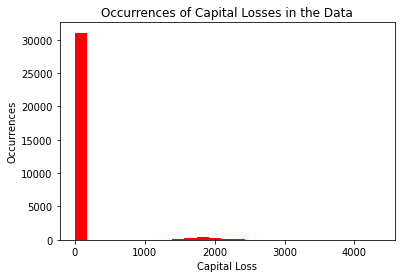

In [221]:
# Creates a histogram for the capital losses 
plt.hist(income94['capital_loss'], bins = 25, color="red") # Monetary losses are referred to as being "in the red"
plt.title('Occurrences of Capital Losses in the Data')
plt.xlabel('Capital Loss')
plt.ylabel('Occurrences')
print('') # This avoids the 'Occurrences' label from also being displayed as a text object, since I found that annoying.

###Summary of these Distributions: 
As we can see from the above two histograms, a vast majority of the observations (people) in the `income94` dataset which we are working with have no capital gains, and no capital losses.

Note that these groups do not necessarily overlap entirely, but in both cases, a majority of the people have no changes in capital.

In the initial data exploration above (glimpses at the values in each column), we saw that 29849 people had 0 capital gains, and 31042 people had 0 capital losses.

Thus, it would be best to create new categorical variables which declare whether or not the person in question has any capital gains or losses.

In [222]:
# Creates a helper function which can be used to determine whether a person has capital gains/losses or not. Since capital losses are registered
# as positive numbers in the dataset, the person has gains/losses if and only if the value in the corresponding column is positive.
def isPositive(value):
  return value > 0

# Creates two new variables in the dataframe which declare whether or not the person has any capital gains or losses.
income94['has_capital_gains'] = isPositive(income94['capital_gain'])
income94['has_capital_losses'] = isPositive(income94['capital_loss'])

# Based on these four outputs, we can see that there are an equal amount of "0" entries in each of the columns as "False" values in the corresponding columns.
print(income94['capital_gain'].value_counts())
print("\n")
print(income94['has_capital_gains'].value_counts())
print("\n")
print(income94['capital_loss'].value_counts())
print("\n")
print(income94['has_capital_losses'].value_counts())

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: capital_gain, Length: 119, dtype: int64


False    29849
True      2712
Name: has_capital_gains, dtype: int64


0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: capital_loss, Length: 92, dtype: int64


False    31042
True      1519
Name: has_capital_losses, dtype: int64


Since the amount of false entries are equal to the amount of 0 entries in the corresponding columns for capital gains and losses, we can see that there newly-declared variables match our expectation.

###The Weight Parameter in the Data



####Initial Spread of Weights
In order to better understand the `fnlwgt` variable in the dataset, it would help to create a histogram of the data so that we may see the spread of this variable over our dataset.

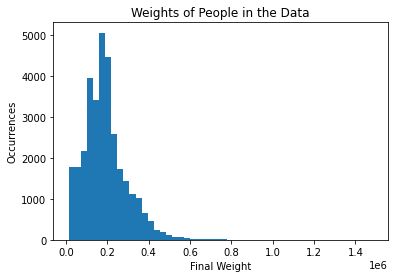

In [223]:
# Creates a histogram for the final weights of the different rows of the data 
plt.hist(income94['fnlwgt'], bins = 50)
plt.title('Weights of People in the Data')
plt.xlabel('Final Weight')
plt.ylabel('Occurrences')
print("")

Clearly, the weights are not symmetrically distributed. Note that the scale of the x-axis is in millions, so a majority of the data is actually in the range from 0 to 800000, as opposed to being in the range from 0 to 0.8.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f197e14e198>,
      dtype=object)

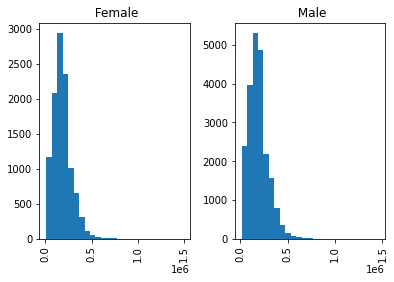

In [224]:
income94['fnlwgt'].hist(by=income94['sex'], bins = 25)

As we can see above, the distribution of the weight parameters is quite similar (in shape) regardless of sex. Note that there are significantly more males than females in the dataset, as the range of occurrences for males exceeds the range for females, and the distributions are similarly shaped.

####Outliers in the Weights

Next, we should look to see if there are any outliers in our data. From the distributions plotted above, we can see that a majority of the weights are approximately in the range from 0 to 300000, and a small amount of them are in the range above 300000.

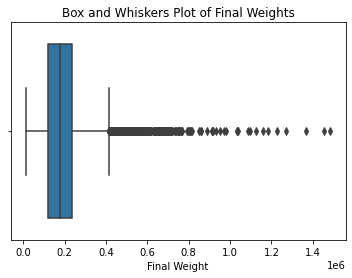

In [225]:
sns.boxplot(x = 'fnlwgt', data = income94)
plt.xlabel('Final Weight')
plt.title('Box and Whiskers Plot of Final Weights')
plt.show()

From this box and whisker plot, we can see that all of the outlier weights are large, as opposed to having the outliers distributed on 'both sides' of the data.

This box-and-whisker plot uses the 'standard' definition of an outlier, which is 1.5 inter-quartile ranges (IQR) away from the first/third quartile.

We can easily find the observations in our data which contain outliers. However, we will not remove the outliers from the dataset, even though all of them are distributed to the same side of the data.

Removing the weights which are outliers is not a good idea for multiple reasons, including:
- The formula for the 'weight' of a person is not clearly outlined, so we do not know which observations will be removed
- People with similar demographic characteristics will have similar weights, so we may be removing smaller or marginalized groups entirely from the data, because a higher demographic weight could correspond to a statistic such as older people or people of a certain race.
- Since the outliers are bunched together with other outliers, these values are likely to be entire groups of people who are similar, so removing these entire populations will make the group of people remaining in our dataset less varied and more monolithic, and thus, less representative of the overall population.